12/27/2017

# k-hop figures

## Summary 

Create homophily index vs. assortativity figures and khop figures for AUC and accuracy. Code organization assumes working directory is notebook folder location.


In [2]:
import pandas as pd
from __future__ import division
from matplotlib.backends.backend_pdf import PdfPages
import os

## relevant libraries
execfile('../functions/python_libraries.py')
execfile('../functions/compute_homophily.py')
execfile('../functions/compute_monophily.py')

## plot homophily index vs. assortativity

In [3]:
# dataset created from soal_script_facebook_script_homophily_index_vs_Newmans_assortativity.py
homophily_assortativity_df = pd.read_csv('../../data/output/facebook_homophily_vs_newmans_assortativity_Dec2017.csv')
drop_schools = np.array(['Wellesley22', 'Smith60', 'Simmons81'])
homophily_assortativity_df = homophily_assortativity_df.loc[~np.in1d(homophily_assortativity_df.school ,drop_schools)]
homophily_assortativity_df.head()

,school,cc_F_count,cc_M_count,cc_homophily_F,cc_homophily_M,cc_avg_homophily,cc_gender_assortativity
0,USFCA72,1697,804,0.669992,0.354041,0.568423,0.024033
1,American75,3703,2289,0.610412,0.416726,0.536422,0.027138
2,USF51,7367,5320,0.540921,0.383605,0.474954,-0.075474
3,Tulane29,3781,3403,0.621450,0.479388,0.554157,0.100838
4,BC17,5624,5061,0.542077,0.472411,0.509080,0.014488


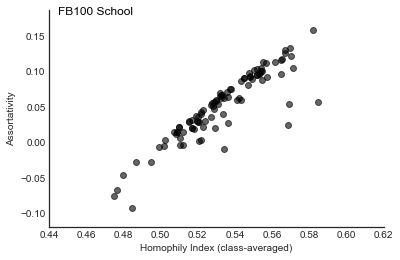

In [4]:
%matplotlib inline
ax = plt.subplot(111)

ax.scatter(homophily_assortativity_df.cc_avg_homophily,
           homophily_assortativity_df.cc_gender_assortativity, 
          color = 'black', alpha = 0.6)


ax.set_xlabel('Homophily Index (class-averaged)')
ax.set_ylabel('Assortativity')

ax.set_xlim(0.44,0.62)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.annotate('FB100 School', xy=(0.445, 0.18), 
                 color='black', alpha=1, size=12)

#plt.show()

pp = PdfPages('../../figures/homophily_index_vs_assortativity_fb100.pdf')
pp.savefig()
pp.close()

## AUC analog of khop figure

In [5]:
#dataset created by: compare_k_hop_friends_vs_AUC_fb.py
khop = pd.read_csv('../../data/output/khop_vs_auc_Nov2017.csv')
khop.head()

,school,k_hop,auc_in_khop_neighborhood,count_0_friends_khop_class1,count_0_friends_khop_class2
0,USFCA72,1,0.596808,0,0
1,USFCA72,2,0.791039,0,0
2,USFCA72,3,0.565924,0,0
3,USFCA72,4,0.643322,0,0
4,USFCA72,5,0.551147,0,0


In [6]:
drop_schools = np.array(['Wellesley22', 'Smith60', 'Simmons81'])

In [7]:
khop = khop.loc[~np.in1d(khop.school ,drop_schools)]

In [8]:
schools = np.unique(khop.school)


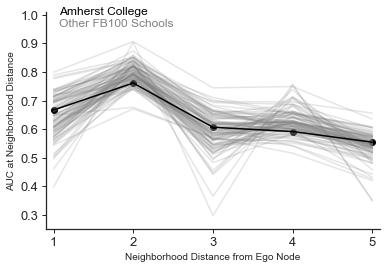

In [9]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([1,2,3,4,5]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        for j in range(len(schools)):
            auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school==schools[j]]
            k_hop = np.array(range(len(auc_array)))+1
            grid[i].plot(k_hop,
               auc_array, color = 'gray', alpha = 0.2)


        auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school=='Amherst41']
        grid[i].plot(k_hop,
           auc_array, color = 'black')#, alpha = 0.3)
        grid[i].scatter(k_hop,
           auc_array, color = 'black')#, alpha = 0.5)

        grid[i].set_xlim(0.9,5.1)
        grid[i].set_ylim(0.25,1.01)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Neighborhood Distance from Ego Node')
        grid[i].set_ylabel('AUC at Neighborhood Distance')
        grid[i].annotate('Amherst College', xy=(1.07, 1), 
                 color='black', alpha=1, size=12)
        grid[i].annotate('Other FB100 Schools', xy=(1.07, 0.96), 
                 color='gray', alpha=1, size=12)

grid[0].set_xticks([1,2,3,4,5])
grid[0].set_yticks([ 0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/khop_vs_auc_NHB_figure_python.pdf')
pp.savefig()
pp.close()
plt.show()


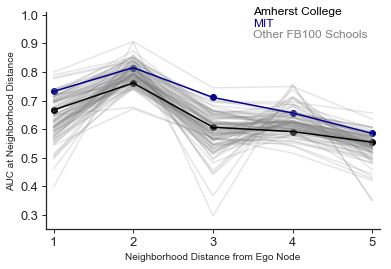

In [10]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([1,2,3,4,5]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        for j in range(len(schools)):
            auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school==schools[j]]
            k_hop = np.array(range(len(auc_array)))+1
            grid[i].plot(k_hop,
               auc_array, color = 'gray', alpha = 0.2)


        auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school=='Amherst41']
        grid[i].plot(k_hop,
           auc_array, color = 'black')#, alpha = 0.3)
        grid[i].scatter(k_hop,
           auc_array, color = 'black')#, alpha = 0.5)
        auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school=='MIT8']
        grid[i].plot(k_hop,
           auc_array, color = 'darkblue')#, alpha = 0.3)
        grid[i].scatter(k_hop,
           auc_array, color = 'darkblue')#, alpha = 0.5)
        
        
        grid[i].set_xlim(0.9,5.1)
        grid[i].set_ylim(0.25,1.01)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Neighborhood Distance from Ego Node')
        grid[i].set_ylabel('AUC at Neighborhood Distance')
        grid[i].annotate('Amherst College', xy=(3.5, 1), 
                 color='black', alpha=1, size=12)
        grid[i].annotate('Other FB100 Schools', xy=(3.5, 0.92), 
                 color='gray', alpha=1, size=12)
        grid[i].annotate('MIT', xy=(3.5, 0.96), 
                 color='darkblue', alpha=1, size=12)

grid[0].set_xticks([1,2,3,4,5])
grid[0].set_yticks([ 0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/khop_vs_auc_NHB_figure_python_SI.pdf')
pp.savefig()
pp.close()
plt.show()


In [19]:
## dataset created from: compare_k_hop_friends_vs_AUC_add_health.py
khop = pd.read_csv('../../data/output/khop_vs_auc_add_health_undirected_Nov2017.csv')
khop.head()

,school,k_hop,auc_in_khop_neighborhood,count_0_friends_khop_class1,count_0_friends_khop_class2
0,comm1,1,0.705236,0,0
1,comm1,2,0.414696,0,0
2,comm1,3,0.437078,0,0
3,comm1,4,0.326014,0,0
4,comm1,5,0.304054,0,0


In [11]:
schools = np.unique(khop.school)
print len(schools)

97


In [12]:
school_drop = np.array(['comm27'])
khop = khop[~np.in1d(khop.school,school_drop)] #%in% schools

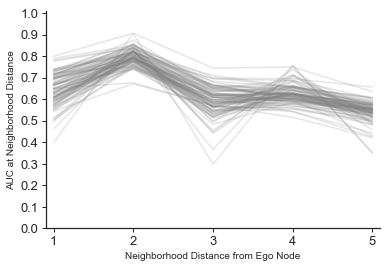

In [13]:
%matplotlib inline
from matplotlib.ticker import FixedLocator,LinearLocator,MultipleLocator, FormatStrFormatter

fig = plt.figure()
seaborn.set_style(style='white')
from mpl_toolkits.axes_grid1 import Grid
grid = Grid(fig, rect=111, nrows_ncols=(1,1),
            axes_pad=0.1, label_mode='L')
for i in range(4):
    if i == 0:
        grid[i].xaxis.set_major_locator(FixedLocator([1,2,3,4,5]))
        grid[i].yaxis.set_major_locator(FixedLocator([0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1]))

        for j in range(len(schools)):
            auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school==schools[j]]
            k_hop = np.array(range(len(auc_array)))+1
            grid[i].plot(k_hop,
               auc_array, color = 'gray', alpha = 0.2)


        #auc_array = np.array(khop.auc_in_khop_neighborhood)[khop.school=='Amherst41']
        #grid[i].plot(k_hop,
        #   auc_array, color = 'black')#, alpha = 0.3)
        #grid[i].scatter(k_hop,
        #   auc_array, color = 'black')#, alpha = 0.5)

        grid[i].set_xlim(0.9,5.1)
        grid[i].set_ylim(0.1,1.01)

        grid[i].spines['right'].set_visible(False)
        grid[i].spines['top'].set_visible(False)
        grid[i].tick_params(axis='both', which='major', labelsize=13)
        grid[i].tick_params(axis='both', which='minor', labelsize=13)
        grid[i].set_xlabel('Neighborhood Distance from Ego Node')
        grid[i].set_ylabel('AUC at Neighborhood Distance')
        #grid[i].annotate('Amherst College', xy=(1.07, 1), 
        #         color='black', alpha=1, size=12)
        #grid[i].annotate('Other FB100 Schools', xy=(1.07, 0.96), 
        #         color='gray', alpha=1, size=12)

grid[0].set_xticks([1,2,3,4,5])
grid[0].set_yticks([ 0,0.1,0.2, 0.3,0.4, 0.5,0.6,0.7,0.8,0.9,1])


grid[0].minorticks_on()
grid[0].tick_params('both', length=4, width=1, which='major', left=1, bottom=1, top=0, right=0)
pp = PdfPages('../../figures/khop_vs_auc_NHB_figure_python_add_health.pdf')
pp.savefig()
pp.close()
plt.show()


## accuracy analog of khop figure

In [14]:
## dataset for FB100 created for compare_k_hop_friends_vs_proportion_class_same.py
khop = pd.read_csv('../../data/output/khop_vs_proportion_same_Nov2017.csv')
print khop.head()
khop = khop.loc[~np.in1d(khop.school ,drop_schools)]
schools = np.unique(khop.school)


    school  k_hop  proportion_nodes_majority_same_class_in_khop_neighborhood  \
0  USFCA72      1                                           0.555778           
1  USFCA72      2                                           0.671331           
2  USFCA72      3                                           0.448221           
3  USFCA72      4                                           0.377049           
4  USFCA72      5                                           0.322671           

   count_0_friends_khop_class1  count_0_friends_khop_class2  
0                            0                            0  
1                            0                            0  
2                            0                            0  
3                            0                            0  
4                            0                            0  


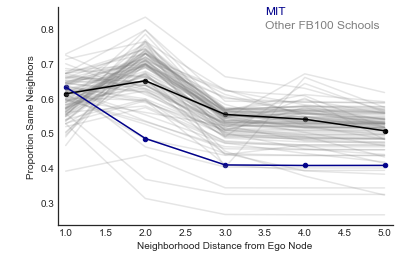

In [15]:
%matplotlib inline
ax = plt.subplot(111)

for j in range(len(schools)):
    auc_array = np.array(khop.proportion_nodes_majority_same_class_in_khop_neighborhood)[khop.school==schools[j]]
    k_hop = np.array(range(len(auc_array)))+1
    ax.plot(k_hop,
           auc_array, color = 'gray', alpha = 0.2)
auc_array = np.array(khop.proportion_nodes_majority_same_class_in_khop_neighborhood)[khop.school=='Amherst41']
ax.plot(k_hop,
           auc_array, color = 'black', alpha = 1)
ax.scatter(k_hop,
           auc_array, color = 'black', alpha = 1, s=20)


auc_array = np.array(khop.proportion_nodes_majority_same_class_in_khop_neighborhood)[khop.school=='MIT8']
ax.plot(k_hop,
           auc_array, color = 'darkblue', alpha = 1)
ax.scatter(k_hop,
           auc_array, color = 'darkblue', alpha = 1, s=20)


ax.set_xlabel('Neighborhood Distance from Ego Node')
ax.set_ylabel('Proportion Same Neighbors')

ax.set_xlim(0.9,5.1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_ylim(-100,100)

ax.annotate('Amherst College', xy=(3.5, 0.88), 
                 color='black', alpha=1, size=12)
ax.annotate('MIT', xy=(3.5, 0.84), 
                 color='darkblue', alpha=1, size=12)
ax.annotate('Other FB100 Schools', xy=(3.5, 0.80), 
                 color='gray', alpha=1, size=12)
pp = PdfPages('../../figures/khop_vs_accuracy_proportion_same_NHB_figure_python.pdf')
pp.savefig()
pp.close()